# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from datetime import datetime, timedelta
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\btang\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()

True

In [3]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient

newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])
date = '2022-08-19'
#pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()

In [4]:
# Fetch the Bitcoin news articles
articles_bitcoin = newsapi.get_everything(q='bitcoin', from_param=str(date)[:10],
            to=str(date)[:10],
            language="en",
            sort_by="relevancy",
            page=1)

In [5]:
# Fetch the Ethereum news articles
articles_ethereum = newsapi.get_everything(q='ethereum', from_param=str(date)[:10],
            to=str(date)[:10],
            language="en",
            sort_by="relevancy",
            page=1)

In [6]:
#retrieve Bitcoin titles
headlines_bitcoin = []

for i in range(0, len(articles_bitcoin["articles"])):
    headlines_bitcoin.append(articles_bitcoin["articles"][i]["title"])

print(headlines_bitcoin[1])
print(len(headlines_bitcoin))

Bitcoin sees its steepest decline in a month as hopes fade for a less hawkish Fed
100


In [7]:
#retrieve Ethereum titles
headlines_ethereum = []

for i in range(0, len(articles_ethereum["articles"])):
    headlines_ethereum.append(articles_ethereum["articles"][i]["title"])

print(headlines_ethereum[1])
print(len(headlines_ethereum))

How to Buy Real Estate in the Metaverse
100


In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_score = analyzer.polarity_scores(headlines_bitcoin[0])
df_bitcoin = pd.DataFrame([bitcoin_score], index = [headlines_bitcoin[0]])

for i in range(1, len(headlines_bitcoin)):
    score = analyzer.polarity_scores(headlines_bitcoin[i])
    df_bitcoin = pd.concat([df_bitcoin, pd.DataFrame([score],index = [headlines_bitcoin[i]])])
    
df_bitcoin

,neg,neu,pos,compound
Sudden crypto drop sends bitcoin to 3-wk low - Reuters,0.375,0.625,0.000,-0.4939
Bitcoin sees its steepest decline in a month as hopes fade for a less hawkish Fed,0.000,0.823,0.177,0.4215
US stocks falls as Fed reinforces resolve in hiking rates to cool inflation,0.000,0.692,0.308,0.5994
Oracle insiders explain how it lost the marketing cloud war to Salesforce,0.383,0.617,0.000,-0.7351
Futures fall as Fed rate hike worries sap risk sentiment - Reuters,0.353,0.647,0.000,-0.5994
...,...,...,...,...
USDC Exchange Reserve Spikes – Can This Help Push Bitcoin Back Up?,0.000,0.787,0.213,0.4019
Top Crypto Hardware Wallets for 2022,0.000,0.735,0.265,0.2023
"Bitcoin Price Declines Below 50-Day MA, Is A Recovery Expected?",0.000,1.000,0.000,0.0000
Bitcoin Plummets Under $22k As Exchange Inflows Spike,0.000,1.000,0.000,0.0000


In [9]:
# Create the Ethereum sentiment scores DataFrame
ethereum_score = analyzer.polarity_scores(headlines_ethereum[0])
df_ethereum = pd.DataFrame([ethereum_score], index = [headlines_ethereum[0]])

for i in range(1, len(headlines_ethereum)):
    score = analyzer.polarity_scores(headlines_ethereum[i])
    df_ethereum = pd.concat([df_ethereum, pd.DataFrame([score],index = [headlines_ethereum[i]])])
    
df_ethereum

,neg,neu,pos,compound
Dollar hits 1-month high as Fed officials talk up rate hikes - Reuters,0.0,1.000,0.000,0.0000
How to Buy Real Estate in the Metaverse,0.0,1.000,0.000,0.0000
What is the ethereum merge?,0.0,1.000,0.000,0.0000
"Why Bitcoin, Ethereum, and Dogecoin Plunged This Morning",0.0,1.000,0.000,0.0000
Ethereum's core developers have set September 15 as the tentative date for the long-awaited proof-of-stake Merge upgrade (Olga Kharif/Bloomberg),0.0,1.000,0.000,0.0000
...,...,...,...,...
Gemini Offers Support for Staking Ahead of Ethereum Network's September 15 Merge Event,0.0,0.816,0.184,0.4019
"Total Crypto Liquidations Exceed $500 Million As Bitcoin, Ether And Shiba Inu Tank",0.0,1.000,0.000,0.0000
Top tweets of the day – August 19th,0.0,0.769,0.231,0.2023
"Ethereum Price Takes a Fall With 4 Weeks Till the Merge, But Still Up 94% in 2 Months",0.0,1.000,0.000,0.0000


In [10]:
# Describe the Bitcoin Sentiment
df_bitcoin.describe()

,neg,neu,pos,compound
count,100.000000,100.000000,100.000000,100.000000
mean,0.129440,0.816670,0.053910,-0.123639
std,0.168605,0.182819,0.108091,0.329460
min,0.000000,0.335000,0.000000,-0.786700
25%,0.000000,0.681500,0.000000,-0.476700
50%,0.000000,0.823500,0.000000,0.000000
75%,0.271500,1.000000,0.073250,0.000000
max,0.665000,1.000000,0.508000,0.659700


In [11]:
# Describe the Ethereum Sentiment
df_ethereum.describe()

,neg,neu,pos,compound
count,100.000000,100.000000,100.000000,100.000000
mean,0.067490,0.869080,0.063480,-0.013525
std,0.122113,0.159921,0.123057,0.287330
min,0.000000,0.455000,0.000000,-0.709600
25%,0.000000,0.767500,0.000000,-0.140475
50%,0.000000,1.000000,0.000000,0.000000
75%,0.140500,1.000000,0.073750,0.000000
max,0.545000,1.000000,0.508000,0.778300


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had a higher mean positive score.

Q: Which coin had the highest compound score?

A: Ethereum had a higher max compound score.

Q. Which coin had the highest positive score?

A: Bitcoin and Ethereum had an equal max positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^\w\s]")
    re_clean = regex.sub('',text)   

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase & Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output

In [15]:
# Create a new tokens column for Bitcoin
df_bitcoin['tokens'] = df_bitcoin.apply(lambda row : tokenizer(row.name), axis = 1)
df_bitcoin

,neg,neu,pos,compound,tokens
Sudden crypto drop sends bitcoin to 3-wk low - Reuters,0.375,0.625,0.000,-0.4939,"[sudden, crypto, drop, sends, bitcoin, 3wk, lo..."
Bitcoin sees its steepest decline in a month as hopes fade for a less hawkish Fed,0.000,0.823,0.177,0.4215,"[bitcoin, see, steepest, decline, month, hope,..."
US stocks falls as Fed reinforces resolve in hiking rates to cool inflation,0.000,0.692,0.308,0.5994,"[us, stock, fall, fed, reinforces, resolve, hi..."
Oracle insiders explain how it lost the marketing cloud war to Salesforce,0.383,0.617,0.000,-0.7351,"[oracle, insider, explain, lost, marketing, cl..."
Futures fall as Fed rate hike worries sap risk sentiment - Reuters,0.353,0.647,0.000,-0.5994,"[futures, fall, fed, rate, hike, worry, sap, r..."
...,...,...,...,...,...
USDC Exchange Reserve Spikes – Can This Help Push Bitcoin Back Up?,0.000,0.787,0.213,0.4019,"[usdc, exchange, reserve, spikes, help, push, ..."
Top Crypto Hardware Wallets for 2022,0.000,0.735,0.265,0.2023,"[top, crypto, hardware, wallets, 2022]"
"Bitcoin Price Declines Below 50-Day MA, Is A Recovery Expected?",0.000,1.000,0.000,0.0000,"[bitcoin, price, declines, 50day, recovery, ex..."
Bitcoin Plummets Under $22k As Exchange Inflows Spike,0.000,1.000,0.000,0.0000,"[bitcoin, plummets, 22k, exchange, inflows, sp..."


In [16]:
# Create a new tokens column for Ethereum
df_ethereum['tokens'] = df_ethereum.apply(lambda row : tokenizer(row.name), axis = 1)
df_ethereum

,neg,neu,pos,compound,tokens
Dollar hits 1-month high as Fed officials talk up rate hikes - Reuters,0.0,1.000,0.000,0.0000,"[dollar, hit, 1month, high, fed, official, tal..."
How to Buy Real Estate in the Metaverse,0.0,1.000,0.000,0.0000,"[buy, real, estate, metaverse]"
What is the ethereum merge?,0.0,1.000,0.000,0.0000,"[ethereum, merge]"
"Why Bitcoin, Ethereum, and Dogecoin Plunged This Morning",0.0,1.000,0.000,0.0000,"[bitcoin, ethereum, dogecoin, plunged, morning]"
Ethereum's core developers have set September 15 as the tentative date for the long-awaited proof-of-stake Merge upgrade (Olga Kharif/Bloomberg),0.0,1.000,0.000,0.0000,"[ethereums, core, developer, set, september, 1..."
...,...,...,...,...,...
Gemini Offers Support for Staking Ahead of Ethereum Network's September 15 Merge Event,0.0,0.816,0.184,0.4019,"[gemini, offers, support, staking, ahead, ethe..."
"Total Crypto Liquidations Exceed $500 Million As Bitcoin, Ether And Shiba Inu Tank",0.0,1.000,0.000,0.0000,"[total, crypto, liquidations, exceed, 500, mil..."
Top tweets of the day – August 19th,0.0,0.769,0.231,0.2023,"[top, tweet, day, august, 19th]"
"Ethereum Price Takes a Fall With 4 Weeks Till the Merge, But Still Up 94% in 2 Months",0.0,1.000,0.000,0.0000,"[ethereum, price, takes, fall, 4, weeks, till,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
df_bitcoin['bigrams'] = df_bitcoin.apply(lambda row : ['_'.join(i) for i in ngrams(row['tokens'], 2)], axis=1)
df_bitcoin

,neg,neu,pos,compound,tokens,bigrams
Sudden crypto drop sends bitcoin to 3-wk low - Reuters,0.375,0.625,0.000,-0.4939,"[sudden, crypto, drop, sends, bitcoin, 3wk, lo...","[sudden_crypto, crypto_drop, drop_sends, sends..."
Bitcoin sees its steepest decline in a month as hopes fade for a less hawkish Fed,0.000,0.823,0.177,0.4215,"[bitcoin, see, steepest, decline, month, hope,...","[bitcoin_see, see_steepest, steepest_decline, ..."
US stocks falls as Fed reinforces resolve in hiking rates to cool inflation,0.000,0.692,0.308,0.5994,"[us, stock, fall, fed, reinforces, resolve, hi...","[us_stock, stock_fall, fall_fed, fed_reinforce..."
Oracle insiders explain how it lost the marketing cloud war to Salesforce,0.383,0.617,0.000,-0.7351,"[oracle, insider, explain, lost, marketing, cl...","[oracle_insider, insider_explain, explain_lost..."
Futures fall as Fed rate hike worries sap risk sentiment - Reuters,0.353,0.647,0.000,-0.5994,"[futures, fall, fed, rate, hike, worry, sap, r...","[futures_fall, fall_fed, fed_rate, rate_hike, ..."
...,...,...,...,...,...,...
USDC Exchange Reserve Spikes – Can This Help Push Bitcoin Back Up?,0.000,0.787,0.213,0.4019,"[usdc, exchange, reserve, spikes, help, push, ...","[usdc_exchange, exchange_reserve, reserve_spik..."
Top Crypto Hardware Wallets for 2022,0.000,0.735,0.265,0.2023,"[top, crypto, hardware, wallets, 2022]","[top_crypto, crypto_hardware, hardware_wallets..."
"Bitcoin Price Declines Below 50-Day MA, Is A Recovery Expected?",0.000,1.000,0.000,0.0000,"[bitcoin, price, declines, 50day, recovery, ex...","[bitcoin_price, price_declines, declines_50day..."
Bitcoin Plummets Under $22k As Exchange Inflows Spike,0.000,1.000,0.000,0.0000,"[bitcoin, plummets, 22k, exchange, inflows, sp...","[bitcoin_plummets, plummets_22k, 22k_exchange,..."


In [19]:
# Generate the Ethereum N-grams where N=2
df_ethereum['bigrams'] = df_ethereum.apply(lambda row : ['_'.join(i) for i in ngrams(row['tokens'], 2)], axis=1)
df_ethereum

,neg,neu,pos,compound,tokens,bigrams
Dollar hits 1-month high as Fed officials talk up rate hikes - Reuters,0.0,1.000,0.000,0.0000,"[dollar, hit, 1month, high, fed, official, tal...","[dollar_hit, hit_1month, 1month_high, high_fed..."
How to Buy Real Estate in the Metaverse,0.0,1.000,0.000,0.0000,"[buy, real, estate, metaverse]","[buy_real, real_estate, estate_metaverse]"
What is the ethereum merge?,0.0,1.000,0.000,0.0000,"[ethereum, merge]",[ethereum_merge]
"Why Bitcoin, Ethereum, and Dogecoin Plunged This Morning",0.0,1.000,0.000,0.0000,"[bitcoin, ethereum, dogecoin, plunged, morning]","[bitcoin_ethereum, ethereum_dogecoin, dogecoin..."
Ethereum's core developers have set September 15 as the tentative date for the long-awaited proof-of-stake Merge upgrade (Olga Kharif/Bloomberg),0.0,1.000,0.000,0.0000,"[ethereums, core, developer, set, september, 1...","[ethereums_core, core_developer, developer_set..."
...,...,...,...,...,...,...
Gemini Offers Support for Staking Ahead of Ethereum Network's September 15 Merge Event,0.0,0.816,0.184,0.4019,"[gemini, offers, support, staking, ahead, ethe...","[gemini_offers, offers_support, support_stakin..."
"Total Crypto Liquidations Exceed $500 Million As Bitcoin, Ether And Shiba Inu Tank",0.0,1.000,0.000,0.0000,"[total, crypto, liquidations, exceed, 500, mil...","[total_crypto, crypto_liquidations, liquidatio..."
Top tweets of the day – August 19th,0.0,0.769,0.231,0.2023,"[top, tweet, day, august, 19th]","[top_tweet, tweet_day, day_august, august_19th]"
"Ethereum Price Takes a Fall With 4 Weeks Till the Merge, But Still Up 94% in 2 Months",0.0,1.000,0.000,0.0000,"[ethereum, price, takes, fall, 4, weeks, till,...","[ethereum_price, price_takes, takes_fall, fall..."


In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
token_count(df_bitcoin['tokens'].agg(sum), N=10)

[('bitcoin', 53),
 ('crypto', 35),
 ('price', 11),
 ('fed', 7),
 ('market', 7),
 ('ether', 7),
 ('drop', 6),
 ('ethereum', 6),
 ('markets', 6),
 ('sudden', 5)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
token_count(df_ethereum['tokens'].agg(sum), N=10)

[('ethereum', 34),
 ('bitcoin', 26),
 ('crypto', 19),
 ('merge', 17),
 ('market', 6),
 ('price', 5),
 ('heres', 5),
 ('world', 5),
 ('tornado', 5),
 ('cash', 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

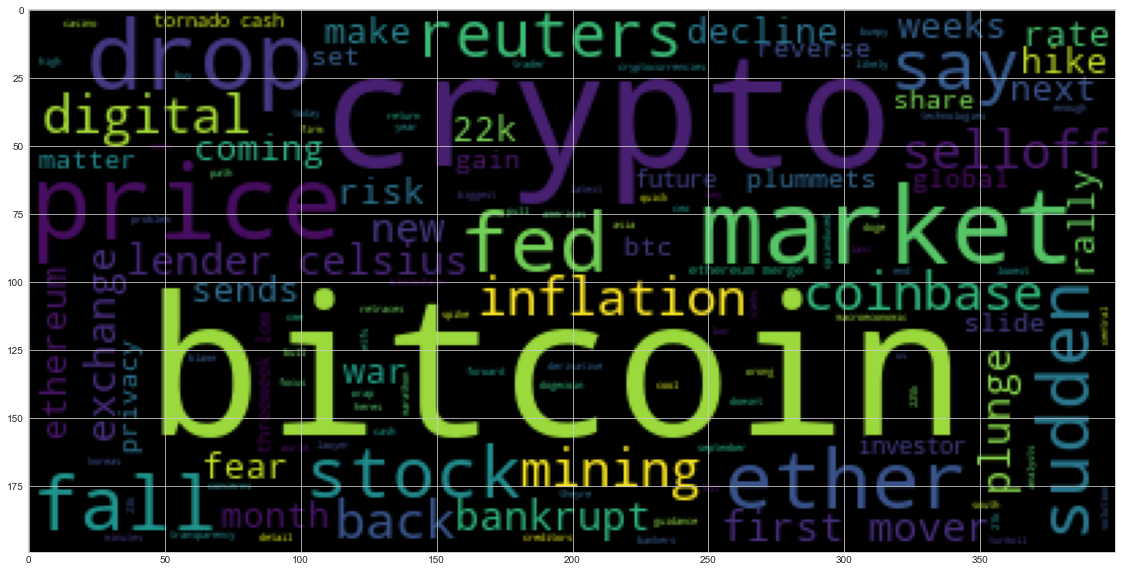

In [24]:
# Generate the Bitcoin word cloud
wc_bitcoin = WordCloud().generate(' '.join(df_bitcoin['tokens'].agg(sum)))
plt.imshow(wc_bitcoin)

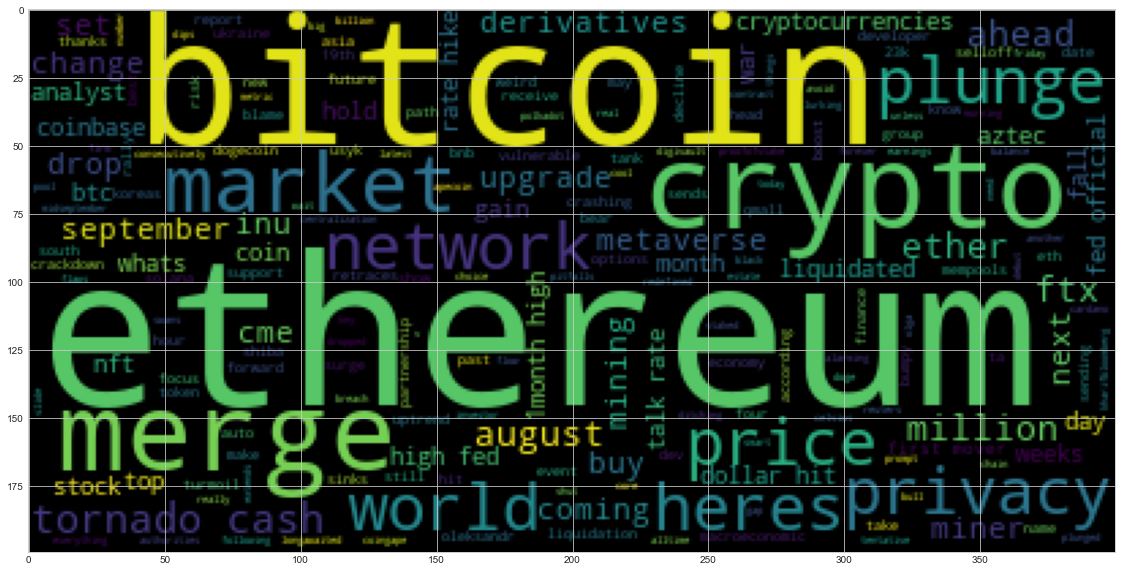

In [25]:
# Generate the Ethereum word cloud
wc_ethereum = WordCloud().generate(' '.join(df_ethereum['tokens'].agg(sum)))
plt.imshow(wc_ethereum)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
bitcoin_headers = ' '.join(df_bitcoin.index)

In [30]:
# Run the NER processor on all of the text
doc_bitcoin = nlp(bitcoin_headers)

In [31]:
# Render the visualization
displacy.render(doc_bitcoin, style='ent')

In [32]:
# List all Entities
[(ent.text, ent.label_) for ent in doc_bitcoin.ents]

[('3', 'CARDINAL'),
 ('a month', 'DATE'),
 ('Fed', 'ORG'),
 ('US', 'GPE'),
 ('Fed', 'ORG'),
 ('Oracle', 'NORP'),
 ('Salesforce Futures', 'ORG'),
 ('Fed', 'ORG'),
 ('Reuters Dollar', 'ORG'),
 ('1-month', 'DATE'),
 ('Fed', 'ORG'),
 ('IRS', 'ORG'),
 ("John Doe'", 'PERSON'),
 ('Coinbase', 'PRODUCT'),
 ('Circ - Reuters', 'ORG'),
 ('Digital Holdings', 'ORG'),
 ('HIVE Blockchain Technologies Are Falling Today Why Bitcoin, Ethereum',
  'ORG'),
 ('Dogecoin Plunged', 'PERSON'),
 ('This Morning The Case For and Against Investing in Crypto', 'WORK_OF_ART'),
 ('1', 'CARDINAL'),
 ('Built With Bitcoin Foundation Constructs', 'ORG'),
 ('Kenya', 'GPE'),
 ('Crypto', 'ORG'),
 ('Credit (Podcast) Bitcoin’s Technical Outlook Bitcoin:', 'ORG'),
 ('Today', 'DATE'),
 ('23,000', 'MONEY'),
 ('Dogecoin', 'ORG'),
 ('Shiba Inu', 'ORG'),
 ('12%', 'PERCENT'),
 ('3 Weeks', 'DATE'),
 ('Ukraine', 'GPE'),
 ('Tech Stores', 'ORG'),
 ('22', 'MONEY'),
 ('A Valuable Coin Are These Cryptos the Next Bitcoin or Ethereum',
  'WOR

---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
ethereum_headers = ' '.join(df_ethereum.index)

In [34]:
# Run the NER processor on all of the text
doc_ethereum = nlp(ethereum_headers)

In [35]:
# Render the visualization
displacy.render(doc_ethereum, style='ent')

In [36]:
# List all Entities
[(ent.text, ent.label_) for ent in doc_ethereum.ents]

[('1-month', 'DATE'),
 ('Fed', 'ORG'),
 ('Bitcoin, Ethereum', 'ORG'),
 ('Dogecoin Plunged', 'PERSON'),
 ("This Morning Ethereum's", 'WORK_OF_ART'),
 ('September 15', 'DATE'),
 ('Merge', 'PERSON'),
 ('Olga Kharif/Bloomberg', 'PERSON'),
 ('Today', 'DATE'),
 ('23,000', 'MONEY'),
 ('Dogecoin', 'ORG'),
 ('Shiba Inu', 'ORG'),
 ('12%', 'PERCENT'),
 ('The Ethereum Merge: Risks, Flaws And The Pitfalls Of Centralization A Bull Market Is Coming',
  'ORG'),
 ('1', 'CARDINAL'),
 ('the Weird World of Ethereum Mempools Are These Cryptos', 'ORG'),
 ('Solana', 'PERSON'),
 ('Polkadot', 'GPE'),
 ('mid-September', 'DATE'),
 ('August', 'DATE'),
 ('the Weird World of Ethereum Mempools First Mover Asia', 'ORG'),
 ('23', 'MONEY'),
 ("South Korea's", 'GPE'),
 ('Ethereum Futures', 'ORG'),
 ('Coinbase', 'ORG'),
 ('22,000', 'MONEY'),
 ('Cardano', 'ORG'),
 ('Solana', 'ORG'),
 ('First Mover Asia', 'ORG'),
 ('23', 'MONEY'),
 ("South Korea's", 'GPE'),
 ('3 Weeks', 'DATE'),
 ('$1,900 Ethereum', 'MONEY'),
 ('Digivault'

---